<a href="https://colab.research.google.com/github/GeorgeKMaina/hotel-bookings-analysis/blob/main/hotel_bookings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Data Cleaning

Why is data cleaning important?
- The quality of your dataset determines the quality of your model 
- Garbage In Garbage Out (GIGO)
- Data cleaning helps to improve the quality and integrity of our data

Data Cleaning involves the following:
1. Checking data validity (dropping rows unnecessary rows,rename column names..)
2. Checking for consistencies in the data (invloves looking for duplicated columns)
3. Checking for data accuracy ( how accurate is the data)
4. Checking for completeness (invloves looking for columns with missing values,imputing missing values,)
5. Uniformity of the dataset (renaming column names in uniform naming conventions, removing whitespaces,data type convertion)

In [ ]:
#importing python libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset
hotelbookings=pd.read_csv(r'C:\Users\carol\Documents\hotel_bookings.csv')

#create a copy of the dataset
hotelbooking=hotelbookings.copy()
#looking at the the first three rows of the data
hotelbookings.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
#having a look at the attributes of the data
print('shape of the dataset: ',hotelbookings.shape)
print('size of the daatset: ',hotelbookings.size)
print('dimensions of the dataset: ',hotelbookings.ndim)

shape of the dataset:  (119390, 32)
size of the daatset:  3820480
dimensions of the dataset:  2


In [ ]:
# lookin at the info of the data
hotelbookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

### Data Cleaning

###### 1. Consistency

In [ ]:
print('number of duplicate rows: ',hotelbookings.duplicated().sum())
print('shape of the original dataset: ',hotelbookings.shape)
print('shape of the dataset after droping duplicate rows: ', hotelbookings.drop_duplicates().shape)

number of duplicate rows:  31994
shape of the original dataset:  (119390, 32)
shape of the dataset after droping duplicate rows:  (87396, 32)


###### 2. Completeness

In [ ]:
#we will look for columns with missing values
missing=hotelbookings.isna().sum()
missing=missing[missing!=0]
print('number of columns with missing values: ', len(missing))

# percentage of missing values in the columns
perc=missing/len(hotelbookings)*100
missing_perc=pd.concat([missing,perc],axis=1)
missing_perc.rename(columns={0:'number of missing values in the column',1:'percentage of missing values in the column'},inplace=True)
missing_perc.sort_values(by='percentage of missing values in the column',ascending=False)

number of columns with missing values:  4


,number of missing values in the column,percentage of missing values in the column
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


imputations of columns with missing values

In [ ]:
#we will drop the columns company because they have a lot of missing values
hotelbookings.drop(['company'],axis=1,inplace=True)

#to confirm if the column was drooped
hotelbookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# for the column country, we will fill the missing values with those of the most repeated country in that column
from scipy.stats import mode
hotelbookings['country'].fillna(mode(hotelbookings['country']).mode[0],inplace=True)
#for the column agent,we will fill it using bboth backward and forward fill
hotelbookings['agent'].fillna(method='bfill',inplace=True)
#for the column children, we will fill the missing values with the mean of that column
hotelbookings['children'].fillna(np.mean(hotelbookings['children']),inplace=True)

In [ ]:
# to confirm if we have dropped and filled the misising values
hotelbookings.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###### 3. Uniformity and Validity

In [ ]:
#removing whitespaces if there are any
hotelbookings.columns.str.strip()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#renaming the column adr to price 
hotelbookings.rename(columns={'adr':'price'},inplace=True)

In [ ]:
# there are two columns babies and children
# we will create a new column and impute it with the sum of babies and children
hotelbookings['kids']=hotelbookings['babies']+ hotelbookings['children']
#creating a new column total visitors
#will be the sum of visitors
hotelbookings['total_visitors']=hotelbookings['adults']+ hotelbookings['kids']
#we will then drop the columns babies and children from our dataset
hotelbookings.drop(['children','babies'],axis=1,inplace=True)

In [ ]:
hotelbookings['price'].describe()

#we cant have a negative price
#we will delete the rows with the negative values
hotelbooking.loc[hotelbookings['price']<0]

#we can see that only one row had a negative price
#which is row 14969

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


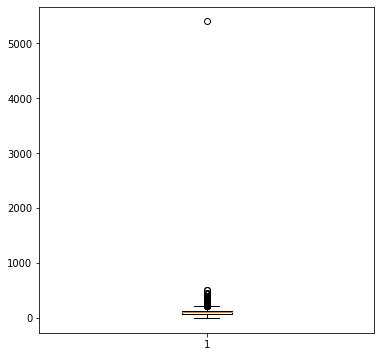

In [ ]:
#identifying the outliers in the column price
plt.figure(figsize=(6,6)) 
plt.boxplot(hotelbookings['price'])
plt.show()

#we can see that there is are outlier

In [ ]:
hotelbookings.loc[hotelbookings['price']>400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_visitors
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,314.0,0,Transient,450.00,0,0,Canceled,2016-07-22,0.0,2.0
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,250.0,0,Transient,437.00,0,0,Canceled,2017-08-03,2.0,4.0
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,6.0,0,Transient,508.00,1,0,Check-Out,2015-07-16,0.0,2.0
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,250.0,0,Transient,426.25,0,2,Check-Out,2017-08-09,2.0,4.0
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,...,240.0,0,Transient,402.00,0,1,Check-Out,2017-08-22,1.0,4.0
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,12.0,0,Transient,5400.00,0,0,Canceled,2016-02-19,0.0,2.0
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,9.0,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02,2.0,4.0
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,159.0,0,Transient,510.00,0,0,Check-Out,2017-05-10,0.0,1.0


In [ ]:
#dropping by the row index
hotelbookings.drop([13142,13391,15083,39155,39568,48515,103912,111403,14969],inplace=True)


In [ ]:
hotelbookings['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# we can split the dataset into two
#to have clients who did not cancel their bookings and those that cancelled their bookings
notcancel=hotelbookings[hotelbookings['is_canceled']==0]
cancelled=hotelbookings[hotelbookings['is_canceled']==0]

#to ensure if the total visitors at any hotel are greater than 0
showed_up=notcancel.loc[(notcancel['total_visitors']>0)]
print('did not cancel: ',notcancel.shape)
print('did not cancel and did showed up:',showed_up.shape )

# this confirms that there a 155 records where the booking was not cancelled and the clients did not show up

did not cancel:  (75160, 31)
did not cancel and did showed up: (75005, 31)


### Data Analysis

###### Questions we will be seeking to answer

- which country were most visitors from
- which hotel had the most visitors
- which hotel did outsiders visit more
- which months,years were the most busiest
- which hotel did had the most kids
- do foreign visitors pay different amounts from the local visitors
- which month of the year do most people visit the hotels?
- which month of the year are there more foreign visitors?
- on average, which month was the cheapest to travel

1. which country were most visitors from

In [ ]:
visitorcountry=pd.pivot_table(showed_up, values=['total_visitors','kids','adults'],index=['country'],aggfunc=np.sum)
visitorcountry.sort_values(by='total_visitors', ascending=False).head(5)

#we can see that most visitors that showed up were from portugal
#this can imply that most visitors to this hotels were local citizen
# we can thus infer that the hotels were in Portugal

,adults,kids,total_visitors
country,,,
PRT,35906,2340.0,38246.0
GBR,18378,878.0,19256.0
FRA,16353,946.0,17299.0
ESP,12196,1013.0,13209.0
DEU,11297,362.0,11659.0


2. which hotel had the most visitors

In [ ]:
hotel_visitors=pd.pivot_table(showed_up,values=['total_visitors','kids','adults'],index=['hotel'],aggfunc=np.sum)
hotel_visitors.sort_values(by='total_visitors',ascending=False)

#most visitors that showed up, visited the city hotel

,adults,kids,total_visitors
hotel,,,
City Hotel,84507,4944.0,89451.0
Resort Hotel,53015,3524.0,56539.0


3. which hotel did outsiders visit more

In [ ]:
#slicing the dataset to get records of visitors who were not from portugal
outsiders=showed_up.loc[hotelbooking['country']!='PRT']
outsiders.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_visitors
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240.0,0,Transient,97.0,0,3,Check-Out,2015-07-05,0.0,2.0


In [ ]:
outsidershotel=pd.pivot_table(outsiders,values=['total_visitors','adults','kids'],index=['hotel'],aggfunc=np.sum)
outsidershotel.sort_values(by='total_visitors',ascending=False)

# most non portugues visitors prefered to visit the city hotel

,adults,kids,total_visitors
hotel,,,
City Hotel,66634,4001.0,70635.0
Resort Hotel,35551,2144.0,37695.0


4. do foreign visitors pay different amounts from the local visitors

In [ ]:
showed_up['averageprice']=showed_up['price']/showed_up['total_visitors']
visitorpay=pd.pivot_table(showed_up,values=['total_visitors','price','averageprice'],index=['country'],aggfunc=np.sum)
visitorpay.sort_values(by='averageprice',ascending=True).head(10)

#on average, foreign visitors pay different amounts from the local visitors

C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,averageprice,price,total_visitors
country,,,
CYM,20.2500,40.50,2.0
MDG,22.0000,44.00,2.0
BDI,23.0000,46.00,2.0
ZMB,24.1675,96.67,4.0
BHS,25.4250,50.85,2.0
ASM,36.0350,72.07,2.0
BWA,39.5000,118.50,3.0
BFA,40.1500,80.30,2.0
LCA,40.3750,80.75,2.0


5. which month do most visitors arrive in the hotels?

In [ ]:
#which month did most visitors arrive in
monthvisitors=pd.pivot_table(showed_up,values=['total_visitors','adults','kids'],index=['arrival_date_month'],aggfunc=np.sum)
monthvisitors.sort_values(by='total_visitors',ascending=False)

#the month of august had the most visitors while that of  January had the least number of visitors
#most visitors with kids visited the hotels in the month of August 
#the month of November had the least number of kids visiting the hotels

,adults,kids,total_visitors
arrival_date_month,,,
August,17163,1967.0,19130.0
July,15697,1618.0,17315.0
May,12930,511.0,13441.0
April,12138,695.0,12833.0
October,12229,491.0,12720.0
June,11899,621.0,12520.0
March,11779,464.0,12243.0
September,11649,419.0,12068.0
February,9435,594.0,10029.0


In [ ]:
# which month do most outsiders visit the hotels
foreignermonths=pd.pivot_table(outsiders,values=['total_visitors','adults','kids'],index=['arrival_date_month'],aggfunc=np.sum)
foreignermonths.sort_values(by='total_visitors',ascending=False)

#most foreign visitors visited the hotels in the month of August
# the least number of foreign visitors in the hotels was in the month of January

,adults,kids,total_visitors
arrival_date_month,,,
August,12677,1342.0,14019.0
July,11380,1166.0,12546.0
May,10555,411.0,10966.0
April,9676,575.0,10251.0
June,9404,474.0,9878.0
October,9250,405.0,9655.0
March,8831,337.0,9168.0
September,8847,296.0,9143.0
February,6341,441.0,6782.0


6.which month was the cheapest to travel

In [ ]:
montavgprice=pd.pivot_table(showed_up,values=['averageprice',],index=['arrival_date_month'],aggfunc=np.sum)
montavgprice.sort_values(by='averageprice',ascending=False)

,averageprice
arrival_date_month,
August,577534.550833
July,491404.729667
May,425355.476500
June,402764.392167
September,391621.454167
October,357193.886833
April,346333.113500
March,299515.645667
February,225952.510167


In [ ]:
#the month of august is the most expensive
# the month of January is the cheapest time to travel